In [44]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Importing the salary file
salaries = pd.read_csv("../Files/Univariate Statistics/Salaries.csv")
salaries.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [3]:
# Renaming the "Unnamed column"
salaries.rename(columns={'Unnamed: 0' : 'ID'}, inplace=True)
salaries.head()

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [4]:
salaries.tail()

,ID,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [5]:
salaries = salaries.set_index("ID")
salaries.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
ID,,,,,,
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500


## Numerical method

In this section, we shall examine some of the numerical summary measures for summarising and describing univariate data.

In [6]:
salaries.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [7]:
salaries["yrs.since.phd"].mean()

22.31486146095718

In [8]:
salaries["yrs.service"].mean()

17.614609571788414

In [9]:
salaries["salary"].mean()

113706.45843828715

In [10]:
salaries["salary"].std()

30289.038694747804

In [11]:
import sympy as sym
from sympy.abc import i, j, k, m, n, x

In [12]:
xi, xm =sym.symbols("x_i x_m")
xi

x_i

In [13]:
xm

x_m

### Sample mean

In [14]:
sym.Sum(xi, (i, 1, n))/n

Sum(x_i, (i, 1, n))/n

In [15]:
def sample_mean(data):
    sample_sum = data.sum()
    count = data.count()
    mean = sample_sum / count
    return mean

In [16]:
sample_mean(salaries["yrs.since.phd"])

22.31486146095718

In [17]:
sample_mean(salaries["yrs.service"])

17.614609571788414

### Sample variance

In [18]:
sym.Sum((xi-xm), (i, 1, n))/(n - 1)

Sum(x_i - x_m, (i, 1, n))/(n - 1)

In [19]:
def variance(data):
    def sample_mean(data):
        mean = data.sum()/data.count()
        return mean
    squared_diff = []
    for i in data:
        mdev = (i - sample_mean(data))
        squared_diff.append(mdev**2)
    ssd = sum(squared_diff)
    var = ssd / (len(squared_diff) - 1)
    return var

In [20]:
variance(salaries['salary'])

917425865.0519297

### Standard Deviation

In [21]:
sym.sqrt(sym.Sum((xi-xm), (i, 1, n))/(n - 1))

sqrt(Sum(x_i - x_m, (i, 1, n))/(n - 1))

In [22]:
def std_dev(data):
    def sample_mean(data):
        mean = data.sum()/data.count()
        return mean
    squared_diff = []
    for i in data:
        mdev = (i - sample_mean(data))
        squared_diff.append(mdev**2)
    ssd = sum(squared_diff)
    var = ssd / (len(squared_diff) - 1)
    std = var**0.5
    return std

In [23]:
std_dev(salaries['salary'])

30289.038694747804

In [24]:
std_dev(salaries['yrs.service'])

13.006023785473102

### Skewness

In [25]:
s = sym.Symbol("s")
s

s

In [26]:
sym.Sum((xi - xm)**3, (i, 1, n))/((n - 1)*s**3)

Sum((x_i - x_m)**3, (i, 1, n))/(s**3*(n - 1))

In [27]:
def skewness(data):
    def sample_mean(data):
        mean = data.sum()/data.count()
        return mean
    def std_dev(data):
        squared_diff = []
        for i in data:
            mdev = (i - sample_mean(data))
            squared_diff.append(mdev**2)
        ssd = sum(squared_diff)
        var = ssd / (len(squared_diff) - 1)
        std = var**0.5
        return std
    cubed_diff = []
    for i in data:
        mdev = (i - sample_mean(data))
        cubed_diff.append(mdev**3)
    skew_sum = sum(cubed_diff)
    s3 = std_dev(data)**3
    n = (len(cubed_diff) - 1)
    skewness = skew_sum / (s3 * n)
    return skewness    

In [28]:
skewness(salaries['yrs.since.phd'])

0.2993637853229659

In [29]:
skewness(salaries['salary'])

0.7109686121251086

In [30]:
skewness(salaries['yrs.service'])

0.6472920514384662

### Taking SymPy further
We can take our formula display further by going from expressions to equations. We can achieve this by employing the machinery of IPython display.

In [33]:
from IPython.display import Math, display
j = sym.sqrt(sym.Sum((x-xm)**2, (i,1,n))/(n-1))
display(Math('j = ' + sym.latex(j)))

<IPython.core.display.Math object>

In [34]:
skew = sym.Sum((xi - xm)**3, (i,1,n))/((n - 1)*s**3)
display(Math('skew = ' + sym.latex(skew)))

<IPython.core.display.Math object>

#### Sigma

In [35]:
from sympy.abc import sigma

In [36]:
skew = sym.Sum((xi - xm)**3, (i,1,n))/((n-1)*sigma**3)
display(Math('skew= ' + sym.latex(skew)))

<IPython.core.display.Math object>

## Graphical Method

### 1. Histogram

<br><strong>Implementation:</strong> (i) Pandas direct plotting (ii) Matplotlib<br><br>

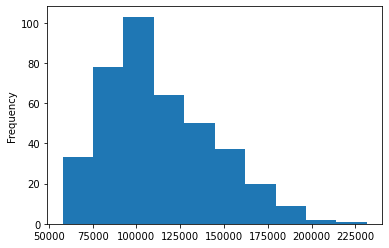

In [37]:
# i - Pandas direct plotting
salaries["salary"].plot.hist();

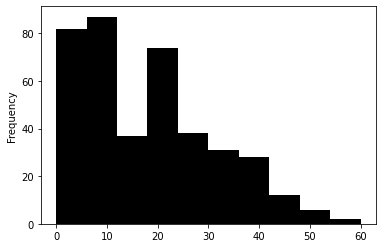

In [41]:
# Changing the color of the histogram
salaries["yrs.service"].plot.hist(color = 'black');

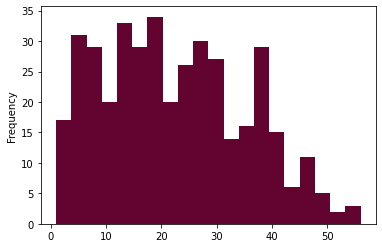

In [42]:
salaries["yrs.since.phd"].plot.hist(color = '#630330', bins = 20);

(array([ 33.,  78., 103.,  64.,  50.,  37.,  20.,   9.,   2.,   1.]),
 array([ 57800. ,  75174.5,  92549. , 109923.5, 127298. , 144672.5,
        162047. , 179421.5, 196796. , 214170.5, 231545. ]),
 <BarContainer object of 10 artists>)

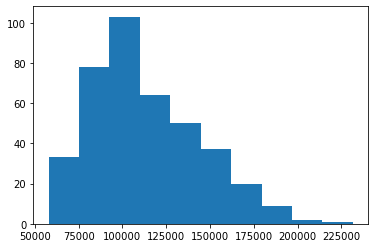

In [45]:
# ii - matplotlib
plt.hist(salaries["salary"])

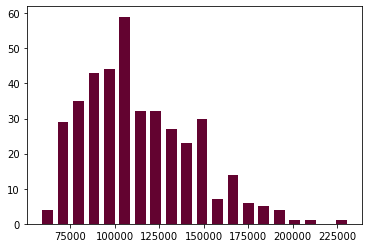

In [46]:
# rwidth - the widths of each bar
n, bins, patches = plt.hist(salaries["salary"], bins = 20, rwidth = 0.7, color= '#630330')

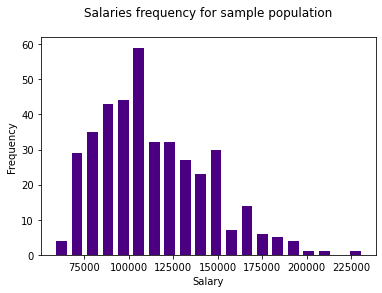

In [51]:
n, bins, patches = plt.hist(salaries["salary"], bins = 20, rwidth = 0.7, color= 'indigo');
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salaries frequency for sample population\n");

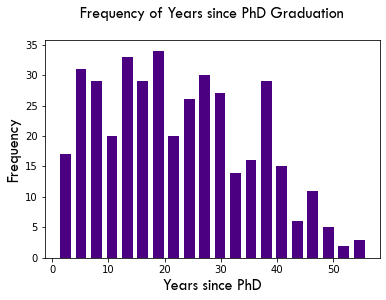

In [52]:
n, bins, patches = plt.hist(salaries["yrs.since.phd"], bins = 20, rwidth = 0.7,
                            color = 'indigo');
plt.xlabel("Years since PhD", fontname="Tw Cen MT", fontsize=16)
plt.ylabel("Frequency", fontname="Tw Cen MT", fontsize=16)
plt.title("Frequency of Years since PhD Graduation\n",fontname="Tw Cen MT", 
          fontsize=16);

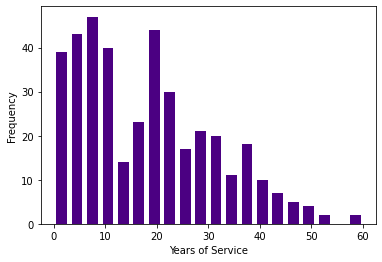

In [56]:
n,bins,patches = plt.hist(salaries["yrs.service"], bins=20, rwidth=0.7, color='indigo')
plt.xlabel("Years of Service")
plt.ylabel("Frequency");

### 2. Strip Plot
<p> A strip plot is a scatter plot but with a single axis. It is a very handy technique for visualising one-dimensional data and displaying the distribution of the data. The values are plotted as dots along one unique axis, and dots with the same value overlap.
    
Strip plots are mostly used to visualise categorical data but also very informative for one-dimensional numerical data. They can also be used together with other plots such as box plots.

<strong>Implementation:</strong> Seaborn

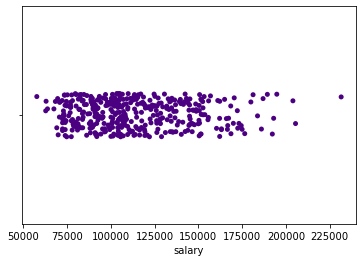

In [58]:
import seaborn as sns
sns.stripplot(x = salaries["salary"], color= 'indigo');

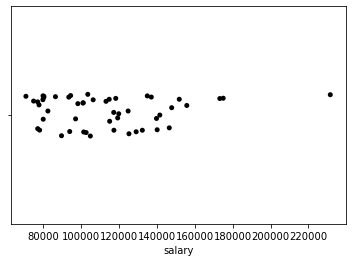

In [61]:
sns.stripplot(x = salaries["salary"].head(50), color= 'black');

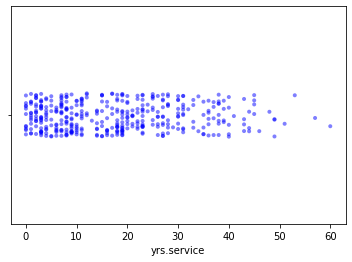

In [62]:
# alpha - it set transparency
# size - it set the 
sns.stripplot(x = salaries["yrs.service"], color='blue', alpha=0.5, size=4);

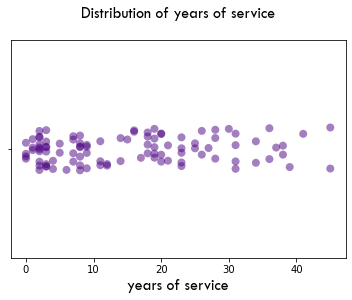

In [63]:
sns.stripplot( x = salaries['yrs.service'].head(100),color='indigo',alpha=0.5,size=8)
plt.xlabel("years of service",fontname="Tw Cen MT", fontsize=16)
plt.title("Distribution of years of service\n",fontname="Tw Cen MT", fontsize=16);

### 3. Box Plot
<p> A boxplot is a one-dimensional graph of numerical data based on the five-number summary, which includes the minimum value, the 25th percentile (known as Q1), the median, the 75th percentile (Q3), and the maximum value. In essence, these five descriptive statistics divide the data set into four equal parts.
    
<strong>Implementation:</strong> (i) Pandas direct plotting (ii) Matplotlib (iii) Seaborn
#### (i) Pandas direct plotting

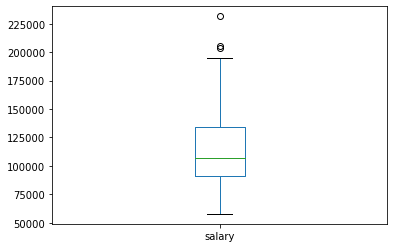

In [64]:
salaries["salary"].plot.box();

#### (ii) Box plots in Matplotlib

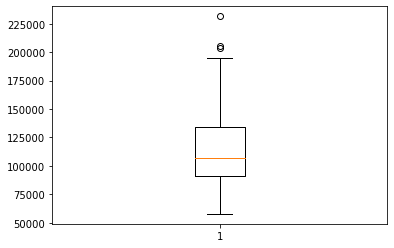

In [65]:
plt.boxplot(salaries["salary"]);

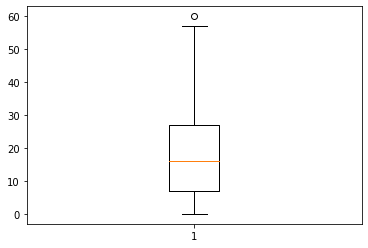

In [66]:
plt.boxplot(salaries["yrs.service"]);

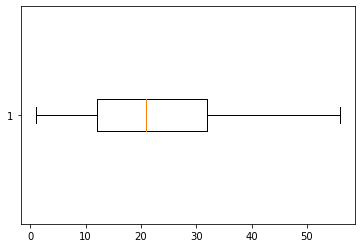

In [67]:
plt.boxplot(salaries["yrs.since.phd"], vert=False);

#### (iii) Box plots in Seaborn

C:\Users\oabas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


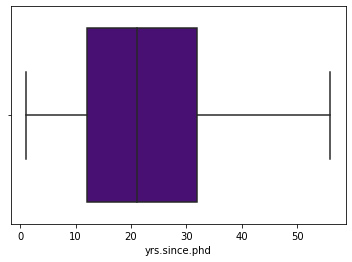

In [70]:
sns.boxplot(salaries["yrs.since.phd"], color = 'indigo');

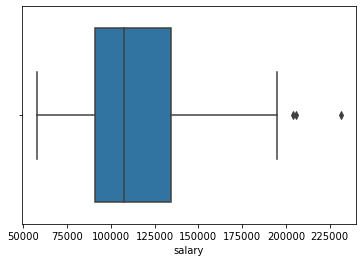

In [71]:
sns.boxplot(x = salaries["salary"]);

In [ ]:
sns.boxplot(y = salaries["yrs"]);